# part a

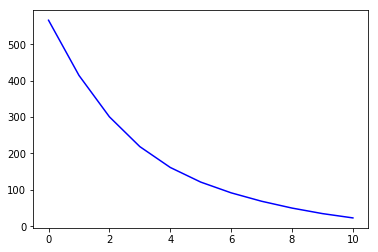

In [2]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

gdmat = sio.loadmat('gradient_descent_data.mat')
A = gdmat['x']
b = gdmat['y']

A2 = 0.1* A[:,1]**3
b = (b.reshape((1000)) + A2).reshape((1000,1))

def gradient_descent(A, b, total_step_count):
    initial_position = np.zeros([2, 1])  
    step_size = 0.005  
    positions = compute_updates(A, b, initial_position, total_step_count, step_size)
    return positions

def compute_gradient(A, b, x):
    return np.dot(A.T, (np.dot(A, x) - b)) / np.linalg.norm(np.dot(A, x) - b)

def compute_update(A, b, x, step_count, step_size):
    return x - step_size * compute_gradient(A, b, x)

def compute_updates(A, b, p, total_step_count, step_size):
    positions = [np.array(p)]
    for k in range(total_step_count):
        positions.append(compute_update(A, b, positions[-1], k, step_size))
    return np.array(positions)

def mse(A, b, w):
    b_pred = np.dot(A, w)
    error = np.mean((b - b_pred)**2)
    return error

mse_errors = []
positions = gradient_descent(A, b, 10)
for w in positions:
    error = mse(A,b,w)
    mse_errors.append(error)

plt.plot(range(len(positions)), mse_errors, c='blue')

plt.show()

# part b

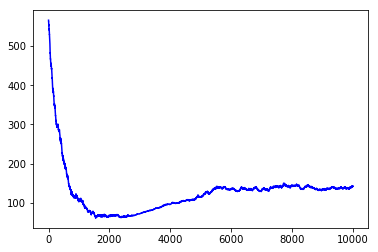

In [3]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

gdmat = sio.loadmat('gradient_descent_data.mat')
A = gdmat['x']
b = gdmat['y']

A2 = 0.1* A[:,1]**3
b = (b.reshape((1000)) + A2).reshape((1000,1))


def gradient_descent(A, b, total_step_count):
    initial_position = np.zeros([2, 1])  
    step_size =  0.005
    positions = compute_updates(A, b, initial_position, total_step_count, step_size)
    return positions

def compute_gradient(A, b, x):
    return (A*(A*x - b)) / np.linalg.norm(A*x - b)

def compute_update(A, b, x, step_size):
    return x - step_size * compute_gradient(A, b, x)

def compute_updates(A, b, p, total_step_count, step_size):
    positions = [np.array(p)]
    for k in range(total_step_count):
        index = int(1000 * np.random.rand())
        positions.append(compute_update(A[index], b[index], positions[-1], step_size))
    return positions

def mse(A, b, w):
    b_pred = np.dot(A, w)
    error = np.mean((b - b_pred)**2)
    return error

mse_errors = []
positions =  gradient_descent(A, b, 10000)

for w in positions:
    mse_errors.append(mse(A, b, w))

plt.plot(range(len(positions)), mse_errors, c='blue')
plt.plot()
plt.show()

# part d

1.0


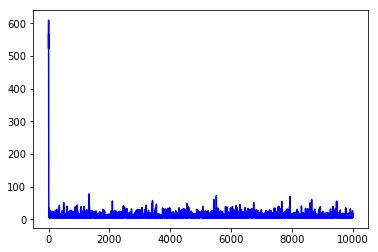

In [6]:
""" Tools for calculating Gradient Descent for ||Ax-b||. """
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
gdmat = sio.loadmat('gradient_descent_data.mat')
x = gdmat['x']
y = gdmat['y']
A = np.matrix(x)   # do not change this until the last part
A2 = 0.1* x[:,1]**3
y = (y.reshape((1000)) + A2).reshape((1000,1))
b = np.matrix(y)
prob = []
for i in range(A.shape[0]):
    prob.append((np.linalg.norm(A[i])**2)/(np.linalg.norm(A)**2))
prob = np.array(prob)
print(sum(prob))
def gradient_descent(A, b, total_step_count):
    ################################################################################
    # TODO(student): Input Variables

    initial_position = np.array([[0], [0]])  # position at iteration 0
    #step_size = lambda i: 0.005  # step size at iteration i
    ################################################################################

    # computes desired number of steps of gradient descent
    positions = compute_updates(A, b, initial_position, total_step_count)
    #w = positions[-1]
    #print(w)
    #error = mse(A, b, w)
    return positions

def compute_gradient(A, b, x, j):
    """Computes the gradient of ||Ax-b|| with respect to x."""
    return (A[j].dot(x) - b[j]).dot(A[j]).T


def compute_update(A, b, x, j):
    """Computes the new point after the update at x."""
    step_size = 1/(np.linalg.norm(A[j])**2)
    return x - step_size * compute_gradient(A, b, x, j)


def compute_updates(A, b, p, total_step_count):
    """Computes several updates towards the minimum of ||Ax-b|| from p.

    Params:
        b: in the equation ||Ax-b||
        p: initialization point
        total_step_count: number of iterations to calculate
        step_size: function for determining the step size at step i
    """
    positions = [np.array(p)]
    for k in range(total_step_count):
        j = np.random.choice(1000, p = prob)
        #print(index)
        positions.append(compute_update(A, b, positions[-1], j))
    return np.array(positions)

def mse(A, b, w):
    n = b.shape[0]
    b_pred = A.dot(w)
    error = (np.linalg.norm(b - b_pred)**2)/n
    return error

mse_errors = []
step_size = []
positions =  gradient_descent(A, b, 10000)
for i in range (10000):
    w = positions[i]
    mse_errors.append(mse(A, b, w))
    step_size.append(i)
'''
for step, err in zip(step_size, mse_errors):
    print(step, err)
'''


#plt.scatter(positions[:, 0], positions[:, 1], c='blue')
#plt.scatter(np.dot(np.linalg.inv(A), b)[0], np.dot(np.linalg.inv(A), b)[1], c='red')
plt.plot(step_size, mse_errors, c='blue')
plt.plot()
plt.show()